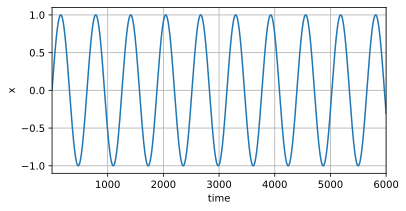

In [140]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 6000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
x = torch.sin(0.01 * time)

d2l.plot(time, [x], 'time', 'x', xlim=[1, T], figsize=(6, 3))

In [157]:
tau = 36
features = torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i] = x[i:T-tau+i]

labels = x[tau:].reshape(-1,1)
# labels = x[tau:]

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train],labels[:n_train]),batch_size,is_train=True)

features.shape,labels.shape

(torch.Size([5964, 36]), torch.Size([5964, 1]))

In [158]:
net = nn.Sequential(nn.LazyLinear(20),
                    nn.ReLU(),
                    nn.LazyLinear(10),
                    nn.ReLU(),
                    nn.LazyLinear(5),
                    nn.ReLU(),
                    nn.LazyLinear(1))

In [162]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

epochs = 200
# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')
train(net, train_iter, loss, epochs, 0.001)

epoch 1, loss: 0.000018
epoch 2, loss: 0.000001
epoch 3, loss: 0.000001
epoch 4, loss: 0.000001
epoch 5, loss: 0.000001
epoch 6, loss: 0.000001
epoch 7, loss: 0.000001
epoch 8, loss: 0.000001
epoch 9, loss: 0.000002
epoch 10, loss: 0.000001
epoch 11, loss: 0.000001
epoch 12, loss: 0.000000
epoch 13, loss: 0.000001
epoch 14, loss: 0.000000
epoch 15, loss: 0.000000
epoch 16, loss: 0.000001
epoch 17, loss: 0.000000
epoch 18, loss: 0.000001
epoch 19, loss: 0.000000
epoch 20, loss: 0.000001
epoch 21, loss: 0.000000
epoch 22, loss: 0.000000
epoch 23, loss: 0.000003
epoch 24, loss: 0.000001
epoch 25, loss: 0.000000
epoch 26, loss: 0.000000
epoch 27, loss: 0.000000
epoch 28, loss: 0.000000
epoch 29, loss: 0.000000
epoch 30, loss: 0.000001
epoch 31, loss: 0.000001
epoch 32, loss: 0.000001
epoch 33, loss: 0.000000
epoch 34, loss: 0.000000
epoch 35, loss: 0.000000
epoch 36, loss: 0.000001
epoch 37, loss: 0.000001
epoch 38, loss: 0.000001
epoch 39, loss: 0.000008
epoch 40, loss: 0.000002
epoch 41,

In [163]:
onestep_preds = net(features)

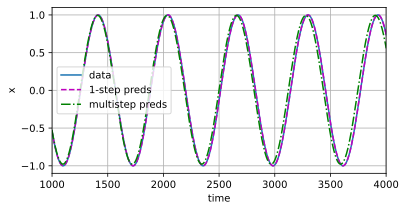

In [167]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(
        multistep_preds[i - tau:i].reshape((1, -1)))

start_i = 1000
interval = 3000
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[start_i, start_i+interval], figsize=(6, 3))

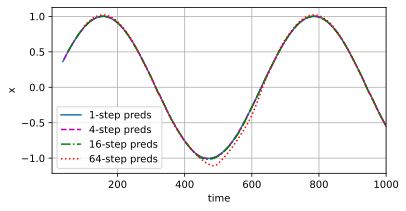

In [149]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# 列i（i<tau）是来自x的观测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1]

# 列i（i>=tau）是来自（i-tau+1）步的预测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [features[:, tau + i - 1].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))